# [IAPR 2020:][iapr2020] Lab 1 ‒  Image segmentation

**Author:** first name and last name  
**Due date:** 26.03.2020

[iapr2018]: https://github.com/LTS5/iapr-2020

## Extract relevant data
We first need to extract the `lab-01-data.tar.gz` archive.
To this end, we use the [tarfile] module from the Python standard library.

[tarfile]: https://docs.python.org/3.6/library/tarfile.html

In [3]:
import tarfile
import os

data_base_path = os.path.join(os.pardir, 'data')
data_folder = 'lab-01-data'
tar_path = os.path.join(data_base_path, data_folder + '.tar.gz')
with tarfile.open(tar_path, mode='r:gz') as tar:
    tar.extractall(path=data_base_path)

## Part 1: Brain segmentation

Your goal: compute the size of the brain (in pixels) in a 2D image of a human head taken by Magnetic Resonance Imaging (MRI).
* Try as many methods as you can, the more the better.
* At least region growing and contour detection.

### 1.1 Brain image visualization

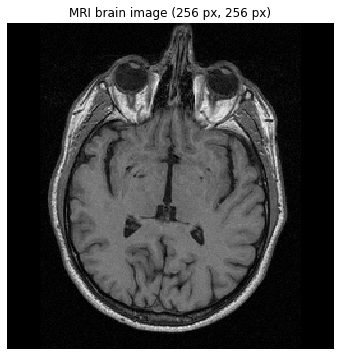

In [4]:
import skimage.io
import matplotlib.pyplot as plt
%matplotlib inline

# Load image
data_path = os.path.join(data_base_path, data_folder)
brain_im = skimage.io.imread(os.path.join(data_path, 'brain-slice40.tiff'))
im_h, im_w = brain_im.shape

fig, ax = plt.subplots(1, 1, figsize=(6, 6))
ax.imshow(brain_im, cmap='gray')
ax.set_title('MRI brain image ({} px, {} px)'.format(im_h, im_w))
ax.axis('off')
plt.show()

### 1.2 Region growing
Add your implementation and discussion

index and value of threshold  0 0
index and value of threshold  1 70
index and value of threshold  2 100


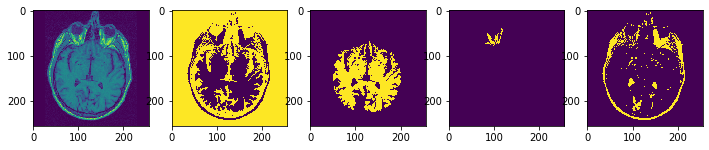

In [5]:
import numpy as np
from matplotlib import pyplot as plt

pixel_classified = np.zeros(brain_im.shape) #1 when classified

list = [0,70, 100,280]
neighbors_coor = [(-1, 0), (1, 0), (0, -1), (0, 1), (-1,-1), (-1,1), (1,-1), (1,1)]

#define seed1
seed=[0,0]
seed_found=0

#define segmented image
segmented_img = np.zeros((im_h, im_w, len(list)), np.uint8)

for t in range(len(list)-1):
    print('index and value of threshold ', t, list[t])
    for i in range(70,im_h):
        for j in range(70,im_w):
            nn_isolated_point = 0
            seed = [i,j]
            a=0
            for n in range(len(neighbors_coor)):
                
                #Compute the neighbor pixel position
                x = seed[0] + neighbors_coor[n][0]
                y = seed[1] + neighbors_coor[n][1]
                
                #Boundary Condition - check if the coordinates are inside the image
                check_inside = (x >= 0) & (y >= 0) & (x < im_h) & (y < im_w)
                
                #Add as neighbor if inside and not already classified
                if check_inside and pixel_classified[x, y] == 0 and list[t] <= brain_im[x,y] and brain_im[x,y] < list[t+1]:
                    #print('coor seed ',seed)
                    #print('coor ',x,y)
                    #print ('pixel_classified val ', pixel_classified[x, y])
                    nn_isolated_point += 1
                    #print ('isolated_point ',nn_isolated_point)
                    #a=1
                #if a==1:
                    #print('other coor ',x,y)
                    #print('intensity ',brain_im[x,y], '\n')
                    
            if nn_isolated_point > 7:
                pixel_classified[i,j] = 1
                segmented_img[i,j,t]= 255
                seed_found=1
                break
        if seed_found==1:
            break
    
    neighbor_pts_list = [[-100,-60]] #init

################################################################
################################################################
################################################################
################################################################

    neighbor_in_list = np.zeros(brain_im.shape) 
    while neighbor_pts_list!=[]:
        #Loop through 4 neighbors of 1 pixel
        if seed_found == 1:
            seed_found = 0
            neighbor_pts_list.pop(0)
            
            for i in range(len(neighbors_coor)):
                #Compute the neighbor pixel position
                x_new = seed[0] + neighbors_coor[i][0]
                y_new = seed[1] + neighbors_coor[i][1]
                
                #Boundary Condition - check if the coordinates are inside the image
                check_inside = (x_new >= 0) & (y_new >= 0) & (x_new < im_h) & (y_new < im_w)
                #Add as neighbor if inside and not already classified
                if check_inside and pixel_classified[x_new, y_new] == 0 and neighbor_in_list[x_new, y_new] == 0:
                    neighbor_pts_list.append([x_new, y_new])
                    neighbor_in_list[x_new, y_new] = 1
                    
        #if intensity of 1st pixel listed in neighbors is below threshold
        if neighbor_pts_list!=[]:
            if list[t] <= brain_im[neighbor_pts_list[0][0],neighbor_pts_list[0][1]] and \
            brain_im[neighbor_pts_list[0][0],neighbor_pts_list[0][1]] < list[t+1]:
                #pixel is classified
                pixel_classified[neighbor_pts_list[0][0], neighbor_pts_list[0][1]] = 1
                segmented_img[neighbor_pts_list[0][0],neighbor_pts_list[0][1],t]=255
                #new seed that will create new neighbors
                seed = [neighbor_pts_list[0][0], neighbor_pts_list[0][1]]
                seed_found = 1
                
            else:
                neighbor_pts_list.pop(0)

#plots
fig, ax = plt.subplots(1, len(list)+1, figsize=(12, 12))
ax[0].imshow(brain_im)
ax[1].imshow(segmented_img[:,:,0])
ax[2].imshow(segmented_img[:,:,1])
ax[3].imshow(segmented_img[:,:,2])

#last image
segmented_img[:,:,3] = 255*np.ones(brain_im.shape) -segmented_img[:,:,0]-segmented_img[:,:,1]-segmented_img[:,:,2]
ax[4].imshow(segmented_img[:,:,3])


### 1.3 Contour detection
Add your implementation and discussion

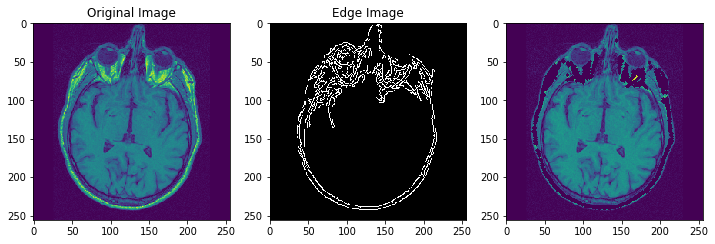

In [6]:
import cv2 as cv

# Display edges in a frame 
edges = cv.Canny(brain_im,0,500)
#canny edge algo: https://towardsdatascience.com/canny-edge-detection-step-by-step-in-python-computer-vision-b49c3a2d8123

fig, ax = plt.subplots(1, 3, figsize=(12, 12))
ax[0].imshow(brain_im)
ax[0].set_title('Original Image')
ax[1].imshow(edges, cmap = 'gray')
ax[1].set_title('Edge Image')

ret, thresh = cv.threshold(brain_im, 127, 255, 0)
contours, hierarchy = cv.findContours(thresh, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)

#cnt = contours[4]
#ax[2].imshow(cv.drawContours(brain_im, [cnt], 0, (255,0,0), 3))
ax[2].imshow(cv.drawContours(brain_im, contours, -1, (0,255,0), 3))
#ax[4].imshow(cv.drawContours(brain_im, [cnt], 0, (255,0,0), 3))



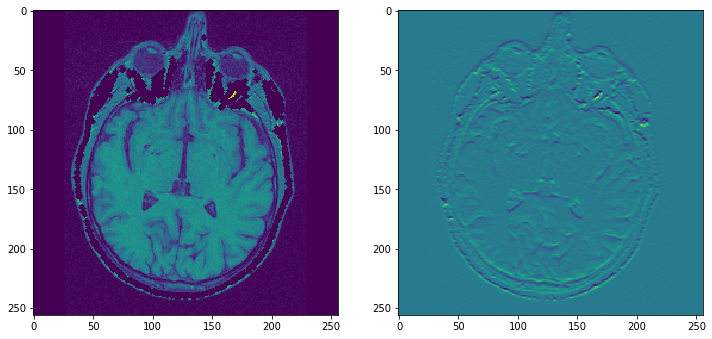

In [8]:
#edge detection - Sobel filters
h1 = 5
h2 = 100
h3 = 100
H = [[h1, h1, h1], #contour enhancement
    [h1, h2, h1],
    [h1, h1, h1]]

H2 = [[0, h1, h3],
      [-h1, 0, h1],
      [-h3, -h1, 0]]

H3 = [[-h1, 0, h1], #not working
      [-h3, 0, h3],
      [-h1, 0, h1]]

H4 = [[-h1, -h3, -h1], 
      [0, 0, 0],
      [h1, h3, h1]]

pixel_matrix = np.zeros((3,3),np.uint8)
brain_contour= np.zeros(brain_im.shape)
for i in range(1,im_h-1):
    for j in range(1,im_w-1): 
        pixel_matrix = [[brain_im[i-1,j+1], brain_im[i,j+1], brain_im[i+1,j+1]],
                        [brain_im[i-1,j+0], brain_im[i,j+0], brain_im[i+1,j+0]],
                        [brain_im[i-1,j-1], brain_im[i,j-1], brain_im[i+1,j-1]]]
        brain_contour[i,j] = np.array(pixel_matrix).dot(np.array(H2)).sum()
        
fig, ax = plt.subplots(1, 2, figsize=(12, 12))
ax[0].imshow(brain_im)
ax[1].imshow(brain_contour)

In [9]:
pixel_matrix = np.zeros((3,3),np.uint8)
i=150
j=150
pixel_matrix = [[brain_im[i-1,j+1], brain_im[i,j+1], brain_im[i+1,j+1]],
                        [brain_im[i-1,j+0], brain_im[i,j+0], brain_im[i+1,j+0]],
                        [brain_im[i-1,j-1], brain_im[i,j-1], brain_im[i+1,j-1]]]
pixel_matrix
np.array(pixel_matrix)
np.array(pixel_matrix).dot(np.array(H)).sum()

34155

### 1.4 Additional method(s)
Add your implementation and discussion

## Part 2: Shape/color segmentation

You will find hereafter three pictures taken under three different illuminations, containing some shapes with different colors. We ask you to create a routine to:

1. Count the number of shapes of each color.
2. Compute the total area (in pixels) of each color.

Please note that one specific challenge is to be robust to illumination changes. Therefore some kind of intensity normalization should probably be used.

**Note:** the routine(s) that you will write for this exercise will be useful for the final project as well, so pay special attention to it.

### 2.1 Visualization

In [10]:
# Load images
data_path = os.path.join(data_base_path, data_folder)
im_names = ['arena-shapes-01', 'arena-shapes-02', 'arena-shapes-03']
filenames = [os.path.join(data_path, name) + '.png' for name in im_names]
ic = skimage.io.imread_collection(filenames)
images = skimage.io.concatenate_images(ic)
print('Number of images: ', images.shape[0])
print('Image size: {}, {} '.format(images.shape[1], images.shape[2]))
print('Number of color channels: ', images.shape[-1])

Number of images:  3
Image size: 480, 640 
Number of color channels:  3


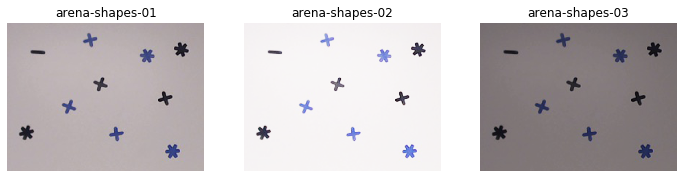

In [11]:
# Plot images
fig, axes = plt.subplots(1, 3, figsize=(12, 12))
for ax, im, nm in zip(axes.ravel(), images, im_names):
    ax.imshow(im)
    ax.axis('off')
    ax.set_title(nm)
plt.show()

### 2.2 Number of shapes of each color
Add your implementation and discussion

In [12]:
#thres
def threshold(img,th1):
    out = np.ones(np.shape(img))
    out[np.where(img < th1)] = 0
    return out

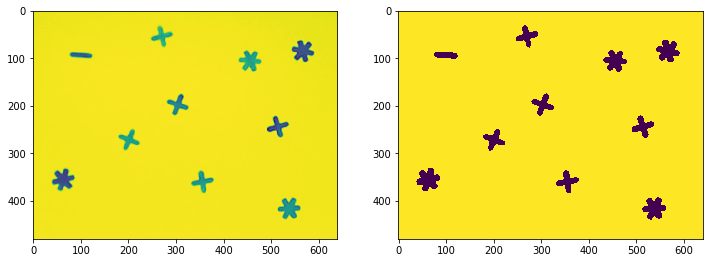

In [13]:
image = images[1]
image_gray = skimage.color.rgb2gray(image)
image_thres = threshold(image_gray, 0.9)

fig, ax = plt.subplots(1, 2, figsize=(12, 12))
ax[0].imshow(image_gray)
ax[1].imshow(image_thres) #0 = black, 1 = background

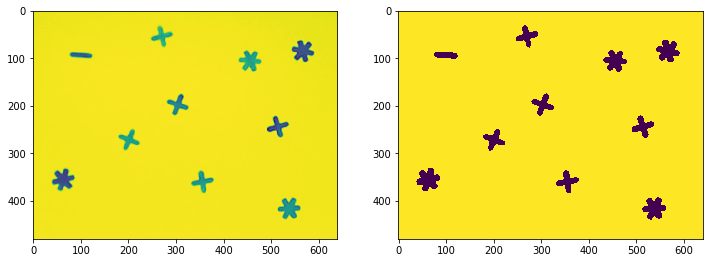

In [14]:
image = images[1]
image_gray = skimage.color.rgb2gray(image)
image_thres = threshold(image_gray, 0.9)

fig, ax = plt.subplots(1, 2, figsize=(12, 12))
ax[0].imshow(image_gray)
ax[1].imshow(image_thres) #0 = black, 1 = background

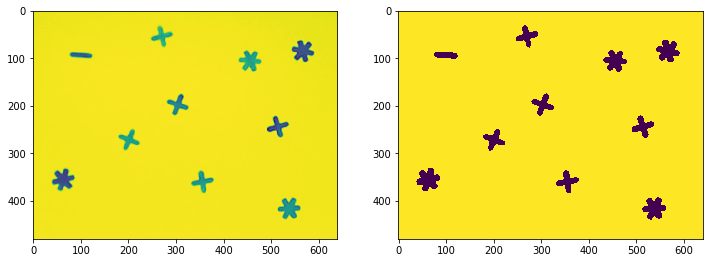

In [15]:
image = images[1]
image_gray = skimage.color.rgb2gray(image)
image_thres = threshold(image_gray, 0.9)

fig, ax = plt.subplots(1, 2, figsize=(12, 12))
ax[0].imshow(image_gray)
ax[1].imshow(image_thres) #0 = black, 1 = background

In [16]:
def check(list, val): 
    # traverse in the list 
    for x_list in list: 
        # compare with all the values 
        # with val 
        if val > x_list and x_list > 0: 
            return x_list 
    return False

There are 10 objects


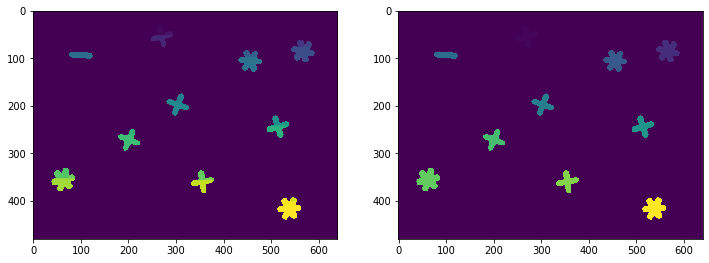

In [17]:
import numpy as np
from matplotlib import pyplot as plt

im_h = image_thres.shape[0] 
im_w = image_thres.shape[1]

label = np.zeros(image_thres.shape, dtype=np.uint)

for i in range(1,im_h-1):
    for j in range(1,im_w-1):
        if image_thres[i,j] == 0:
            label_neighbors = np.max([label[i-1,j+1], label[i,j+1], label[i+1,j+1], label[i-1,j], label[i+1,j],
                        label[i-1,j-1], label[i,j-1], label[i+1,j-1]])
            #print('label_neighbors',label_neighbors)
            if label_neighbors != 0:
                label[i,j] = label_neighbors
            else:
                label[i,j] = np.max(label)+1

fig, ax = plt.subplots(1, 2, figsize=(12, 12))
ax[0].imshow(label)

#merging of labels
label2 = label
for i in range(1,im_h-1):
    for j in range(1,im_w-1):
        label_neighbors = [label2[i-1,j+1], label2[i,j+1], label2[i+1,j+1], label2[i-1,j], label2[i+1,j],
                        label2[i-1,j-1], label2[i,j-1], label2[i+1,j-1]]
        val_min = check(label_neighbors,label2[i,j])
        if check(label_neighbors,label2[i,j]):
            label2[np.where(label2 == label2[i,j])] = val_min
            
ax[1].imshow(label2)

label_final = np.nonzero(np.unique(label2))
label_final = np.asarray(label_final).squeeze()
nb_objects = len(label_final)

print('There are {:d} objects'.format(nb_objects))

In [18]:
#find label
def labeling(img,label):
    out = np.zeros(np.shape(img), dtype = np.uint)
    out[np.where(img == label)] = 1
    return out

There are 6 shapes of light color and 4 shapes of dark color


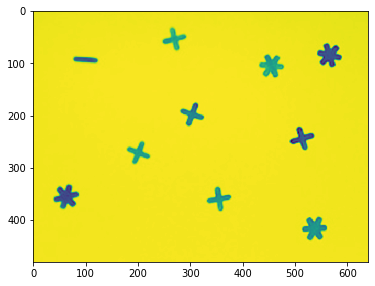

In [19]:
#count nb of objects of different colors
object_color = np.zeros(nb_objects)
object_class = np.zeros(nb_objects) #=0 in light class =1 in dark class
#define 2 kernel for classification
k1 = 0.45
k2 = 0.75
nb_color1 = 0
nb_color2 = 0


for i in range(nb_objects):
    #find where pixels of objects are
    object = labeling(label2,np.unique(label2)[i])
    #define colors of object in gray shades
    object_gray_val = np.array(object)*(np.array(image_gray))
    #define mean value of object
    object_color[i] = object_gray_val[object_gray_val!=0].mean()
    #classify the objects ##use kmean as it doesn't work well
    if abs(object_color[i] - k1) <= abs(object_color[i] - k2):
        nb_color1 += 1
    else:
        nb_color2 += 1
        object_class[i] = 1
    
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
ax.imshow(image_gray)
print('There are {} shapes of light color and {} shapes of dark color'.format(nb_color1,nb_color2))

### 2.3 Total area (in pixels) of each color
Add your implementation and discussion

In [20]:
#creer un mask qui compte les pixels d'une certaine plage de couleur
nb_light_pixels = 0
nb_dark_pixels = 0

for i in range(nb_objects):
    #find where pixels of objects are
    object = labeling(label2,np.unique(label2)[i+1])
    if object_class[i] == 0:
        nb_light_pixels += object.sum()
    else:
        nb_dark_pixels += object.sum()

#background pixels:
object = labeling(label2,np.unique(label2)[0])
nb_backgnd_pixels = object.sum()
total_pixels = im_h*im_w

print('There are {:d} light pixels and {:d} dark pixels so a total of {} pixels. \n In theory there are {} pixels'.format(nb_light_pixels,nb_dark_pixels,nb_light_pixels+nb_dark_pixels+nb_backgnd_pixels,total_pixels))

There are 6751.0 light pixels and 4504.0 dark pixels so a total of 307200.0 pixels. 
 In theory there are 307200 pixels
